In [1]:
!pip install geopandas

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data = pd.read_csv("all-need.csv")
data.head(30)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174186 entries, 0 to 174185
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              174186 non-null  int64  
 1   statename               174154 non-null  object 
 2   year                    174154 non-null  float64
 3   constituency            174186 non-null  object 
 4   distname                170544 non-null  object 
 5   educationNum            174186 non-null  int64  
 6   winner                  174154 non-null  object 
 7   gender                  174173 non-null  object 
 8   criminal_cases          174186 non-null  int64  
 9   serious_criminal_cases  174186 non-null  int64  
 10  assets                  174186 non-null  int64  
 11  liabilities             174186 non-null  int64  
 12  net_assets              174186 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 17.3+ MB


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data['crime'] = data['criminal_cases']* data['serious_criminal_cases']
r = pd.DataFrame(data.groupby(['statename','distname'])['crime','educationNum','net_assets'].mean().reset_index())
r.columns = ['statename','distname', "CASES REPORTED",'education Num','avg_assets']
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,statename,distname,CASES REPORTED,education Num,avg_assets
0,Andhra Pradesh,Anantapur,3.703704,15.791423,2.826707e+07
1,Andhra Pradesh,Chittoor,2.173664,17.568702,5.428210e+07
2,Andhra Pradesh,East Godavari,2.570850,15.842105,1.846676e+07
3,Andhra Pradesh,Guntur,2.198300,15.791785,3.399813e+07
4,Andhra Pradesh,Kadapa(YSR),5.929114,16.567089,3.731312e+07


In [4]:
%matplotlib inline 
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
f = ("output.shp")
map_df = gpd.read_file(f)
map_df.head()

,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry
0,1,05,Uttarakhand,STATE,066,Nainital,4251.0,954605.0,191383.0,493666.0,460939.0,5.322546e+09,506182.695952,"POLYGON ((79.52659 29.05543, 79.52550 29.05545..."
1,2,05,Uttarakhand,STATE,060,Dehradun,3088.0,1696694.0,347001.0,892199.0,804495.0,4.177236e+09,578188.681639,"POLYGON ((77.87557 30.26052, 77.87467 30.26087..."
2,3,05,Uttarakhand,STATE,064,Almora,3144.0,622506.0,140577.0,291081.0,331425.0,4.140751e+09,463454.225766,"POLYGON ((79.28494 29.92735, 79.28495 29.92723..."
3,4,05,Uttarakhand,STATE,065,Champawat,1766.0,259648.0,53953.0,131125.0,128523.0,2.294297e+09,314508.010612,"POLYGON ((80.12479 29.01308, 80.12481 29.01306..."
4,5,05,Uttarakhand,STATE,056,Uttarkashi,8016.0,330086.0,67602.0,168597.0,161489.0,1.085166e+10,786425.588972,"POLYGON ((78.92267 31.25333, 78.93106 31.26840..."


In [6]:
r = r[r['statename'] != 'Lok Sabha']
t1 = r.set_index(['statename','distname'])

t1.head()

CASES REPORTED  education Num    avg_assets
statename      distname                                                  
Andhra Pradesh Anantapur            3.703704      15.791423  2.826707e+07
               Chittoor             2.173664      17.568702  5.428210e+07
               East Godavari        2.570850      15.842105  1.846676e+07
               Guntur               2.198300      15.791785  3.399813e+07
               Kadapa(YSR)          5.929114      16.567089  3.731312e+07

In [7]:

together = map_df.set_index(['statename','distname']).join(t1)
together.head()

objectid statecode state_ut distcode  distarea  \
statename   distname                                                     
Uttarakhand Nainital           1        05    STATE      066    4251.0   
            Dehradun           2        05    STATE      060    3088.0   
            Almora             3        05    STATE      064    3144.0   
            Champawat          4        05    STATE      065    1766.0   
            Uttarkashi         5        05    STATE      056    8016.0   

                        totalpopul   totalhh  totpopmale  totpopfema  \
statename   distname                                                   
Uttarakhand Nainital      954605.0  191383.0    493666.0    460939.0   
            Dehradun     1696694.0  347001.0    892199.0    804495.0   
            Almora        622506.0  140577.0    291081.0    331425.0   
            Champawat     259648.0   53953.0    131125.0    128523.0   
            Uttarkashi    330086.0   67602.0    168597.0    161489.0   

                          st_areasha     st_lengths  \
statename   distname                                  
Uttarakhand Nainital    5.322546e+09  506182.695952   
            Dehradun    4.177236e+09  578188.681639   
            Almora      4.140751e+09  463454.225766   
            Champawat   2.294297e+09  314508.010612   
            Uttarkashi  1.085166e+10  786425.588972   

                                                                 geometry  \
statename   distname                                                        
Uttarakhand Nainital    POLYGON ((79.52659 29.05543, 79.52550 29.05545...   
            Dehradun    POLYGON ((77.87557 30.26052, 77.87467 30.26087...   
            Almora      POLYGON ((79.28494 29.92735, 79.28495 29.92723...   
            Champawat   POLYGON ((80.12479 29.01308, 80.12481 29.01306...   
            Uttarkashi  POLYGON ((78.92267 31.25333, 78.93106 31.26840...   

                        CASES REPORTED  education Num    avg_assets  
statename   distname                                                 
Uttarakhand Nainital          2.302158      18.064748  9.391477e+06  
            Dehradun          2.471338      18.563694  9.025435e+06  
            Almora            0.058824      19.378151  5.223413e+06  
            Champawat         1.818182      15.515152  5.868081e+06  
            Uttarkashi        0.230769      18.807692  6.357407e+06

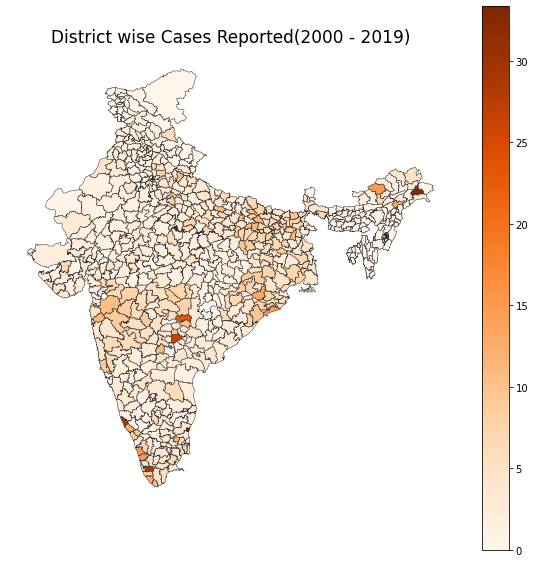

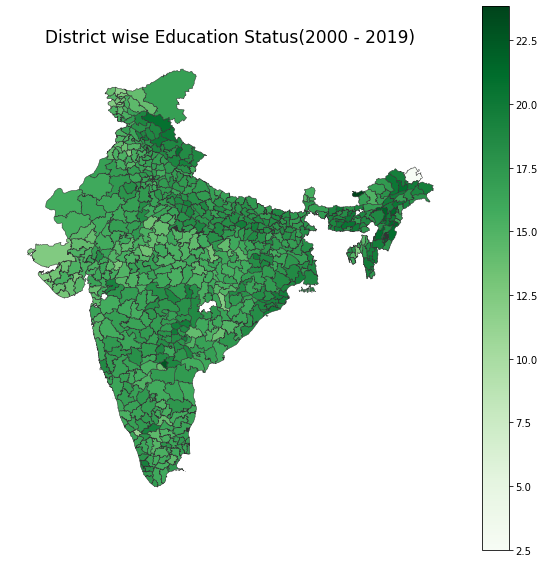

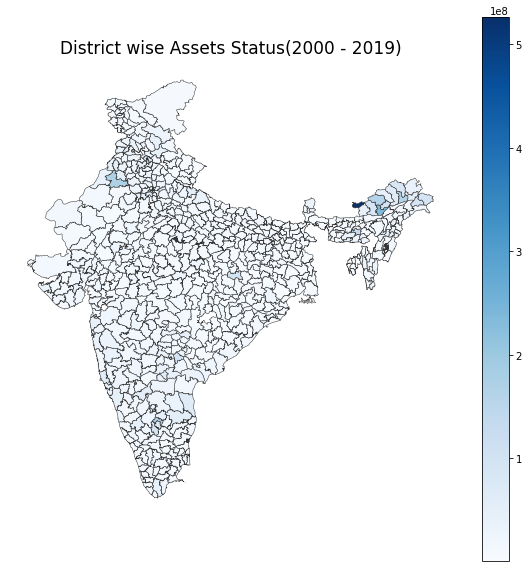

In [8]:
fig,ax=plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("District wise cases Reported (2000 - 2019)",
             fontdict={'fontsize': '15', 'fontweight': "3"})
fig = together.plot(column="CASES REPORTED", cmap="Oranges", linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
fig.set_title("District wise Cases Reported(2000 - 2019)", size=17);

fig,ax=plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("District wise Education Status (2000 - 2019)",
             fontdict={'fontsize': '15', 'fontweight': "3"})
fig = together.plot(column="education Num", cmap="Greens", linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
fig.set_title("District wise Education Status(2000 - 2019)", size=17);

fig,ax=plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("District wise Assets Status (2000 - 2019)",
             fontdict={'fontsize': '15', 'fontweight': "3"})
fig = together.plot(column="avg_assets", cmap="Blues", linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
fig.set_title("District wise Assets Status(2000 - 2019)", size=17);

In [9]:

total_cases_sorted = r.sort_values("CASES REPORTED", ascending=False)[:10]
total_cases_sorted.head()
total_edu_sorted = r.sort_values("education Num", ascending=False)[:10]
total_edu_sorted.head()
total_asset_sorted = r.sort_values("avg_assets", ascending=False)[:10]
total_asset_sorted.head()

,statename,distname,CASES REPORTED,education Num,avg_assets
24,Arunachal Pradesh,Tawang,0.000000,23.833333,5.257749e+08
22,Arunachal Pradesh,Papum Pare,7.363636,16.818182,2.387495e+08
553,Rajasthan,Hanumangarh,3.227545,17.005988,1.705250e+08
17,Arunachal Pradesh,East Siang,0.833333,20.916667,1.633844e+08
262,Karnataka,Bangalore Rural,2.428571,16.500000,1.625038e+08


In [10]:
fig = px.bar(data_frame=total_cases_sorted, x="CASES REPORTED", y="distname", orientation='h', color_discrete_sequence=["red"]);
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(title="Top 10 districts with highest number of Case reported over(2000-2012)")
fig.layout.template ="plotly_dark"
fig.show()
fig = px.bar(data_frame=total_edu_sorted, x="education Num", y="distname", orientation='h', color_discrete_sequence=["green"]);
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(title="Top 10 districts with highest education status over(2000-2012)")
fig.layout.template ="plotly_dark"
fig.show()
fig = px.bar(data_frame=total_asset_sorted, x="avg_assets", y="distname", orientation='h', color_discrete_sequence=["blue"]);
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(title="Top 10 districts with highest Assets status over(2000-2012)")
fig.layout.template ="plotly_dark"
fig.show()

In [11]:
m = pd.DataFrame(r.groupby(["statename"])["CASES REPORTED","education Num","avg_assets"].mean().reset_index())
m.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,statename,CASES REPORTED,education Num,avg_assets
0,Andhra Pradesh,2.623415,16.653522,2.876936e+07
1,Arunachal Pradesh,4.682937,17.749708,1.078842e+08
2,Assam,1.768015,18.998164,1.152911e+07
3,Bihar,6.907456,17.946555,1.144035e+07
4,Chhatisgarh,1.308546,15.783765,1.139600e+07


In [12]:
f = ("Indian_States.shp")
map_df = gpd.read_file(f)
map_df.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [13]:
m.replace(to_replace='Andaman & Nicobar Islands',value='Andaman & Nicobar Island',inplace=True)
m.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)
m.replace(to_replace='Chhatisgarh',value='Chhattisgarh',inplace=True)
m.replace(to_replace='Dadra & Nagar Haveli',value='Dadara & Nagar Havelli',inplace=True)
m.replace(to_replace='Ladakh',value='',inplace=True)
m.replace(to_replace='Orissa',value='Odisha',inplace=True)
m.replace(to_replace='Pondicherry',value='Puducherry',inplace=True)


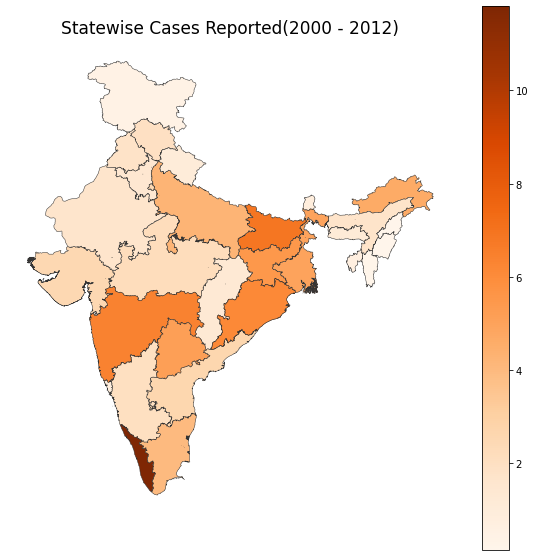

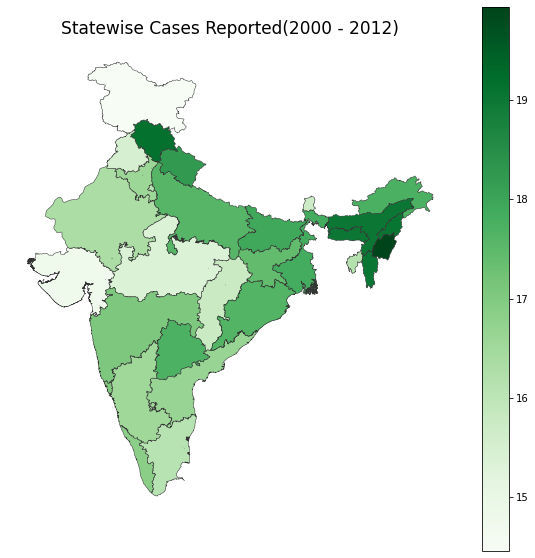

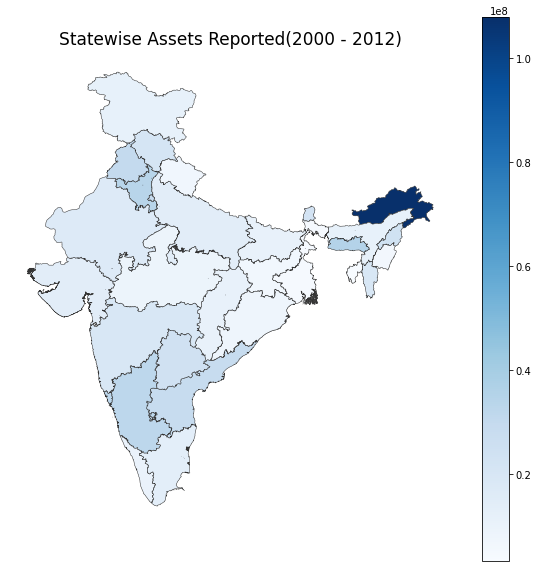

In [14]:
together = map_df.set_index('st_nm').join(m.set_index("statename"))
fig,ax=plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("State wise cases Reported (2000 - 2012)",
             fontdict={'fontsize': '15', 'fontweight': "3"})
fig = together.plot(column="CASES REPORTED", cmap="Oranges", linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
fig.set_title("Statewise Cases Reported(2000 - 2012)", size=17);

fig,ax=plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("State wise cases Reported (2000 - 2012)",
             fontdict={'fontsize': '15', 'fontweight': "3"})
fig = together.plot(column="education Num", cmap="Greens", linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
fig.set_title("Statewise Cases Reported(2000 - 2012)", size=17);

fig,ax=plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("State wise cases Reported (2000 - 2012)",
             fontdict={'fontsize': '15', 'fontweight': "3"})
fig = together.plot(column="avg_assets", cmap="Blues", linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
fig.set_title("Statewise Assets Reported(2000 - 2012)", size=17);

In [15]:
total_cases_sorted = m.sort_values("CASES REPORTED", ascending=False)[:10]
fig = px.bar(data_frame=total_cases_sorted, x="CASES REPORTED", y="statename", orientation='h', color_discrete_sequence=["red"]);
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(title="Top 10 states with highest number of Case reported over(2000-2012)")
fig.layout.template ="plotly_dark"
fig.show()

total_cases_sorted = m.sort_values("education Num", ascending=False)[:10]
fig = px.bar(data_frame=total_cases_sorted, x="education Num", y="statename", orientation='h', color_discrete_sequence=["green"]);
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(title="Top 10 states with highest education status over(2000-2012)")
fig.layout.template ="plotly_dark"
fig.show()

total_cases_sorted = m.sort_values("avg_assets", ascending=False)[:10]
fig = px.bar(data_frame=total_cases_sorted, x="avg_assets", y="statename", orientation='h', color_discrete_sequence=["blue"]);
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(title="Top 10 states with highest Assets status over(2000-2012)")
fig.layout.template ="plotly_dark"
fig.show()